In [2]:
import csv
import pandas as pd
import numpy as np
import pylab as pl
import datetime as dt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv("DATA/NYPD_Motor_Vehicle_Collisions.csv")

In [4]:
bikeAccidents = data[(data['VEHICLE TYPE CODE 1'] == 'BICYCLE') | (data['VEHICLE TYPE CODE 2'] == 'BICYCLE') | (data['VEHICLE TYPE CODE 3'] == 'BICYCLE') | (data['VEHICLE TYPE CODE 4'] == 'BICYCLE') | (data['VEHICLE TYPE CODE 5'] == 'BICYCLE')]

In [5]:
print len(bikeAccidents)
print len(data)

18063
711927


In [6]:
bikeAccidents.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
17,12/05/2015,22:05,MANHATTAN,10016,40.745182,-73.970927,"(40.7451824, -73.9709267)",EAST 37 STREET,FDR DRIVE,NaN,...,Unspecified,NaN,NaN,NaN,3347598,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN
49,12/05/2015,20:55,BRONX,10456,40.833893,-73.899000,"(40.8338927, -73.8990004)",EAST 170 STREET,CLINTON AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3348287,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN
67,12/05/2015,20:15,MANHATTAN,10003,40.727976,-73.988119,"(40.7279758, -73.988119)",EAST 7 STREET,2 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3347571,LIVERY VEHICLE,BICYCLE,NaN,NaN,NaN
124,12/05/2015,19:00,MANHATTAN,10023,40.777410,-73.978798,"(40.7774101, -73.9787983)",COLUMBUS AVENUE,WEST 72 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3347651,TAXI,BICYCLE,NaN,NaN,NaN
175,12/05/2015,17:51,BRONX,10474,40.822533,-73.885086,"(40.822533, -73.8850856)",BRUCKNER BOULEVARD,EDGEWATER ROAD,NaN,...,Unspecified,NaN,NaN,NaN,3347145,SPORT UTILITY / STATION WAGON,BICYCLE,NaN,NaN,NaN


In [7]:
print "NUMBER OF CYCLISTS KILLED: ", sum(bikeAccidents['NUMBER OF CYCLIST KILLED'])
print "NUMBER OF CYCLISTS INJURED: ", sum(bikeAccidents['NUMBER OF CYCLIST INJURED'])

NUMBER OF CYCLISTS KILLED:  52
NUMBER OF CYCLISTS INJURED:  14080


In [8]:
bikeAccidents.DATE=pd.to_datetime(bikeAccidents.DATE)

/Users/michelleho/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [9]:
bikeAccidents.DATE.loc[17].month

12

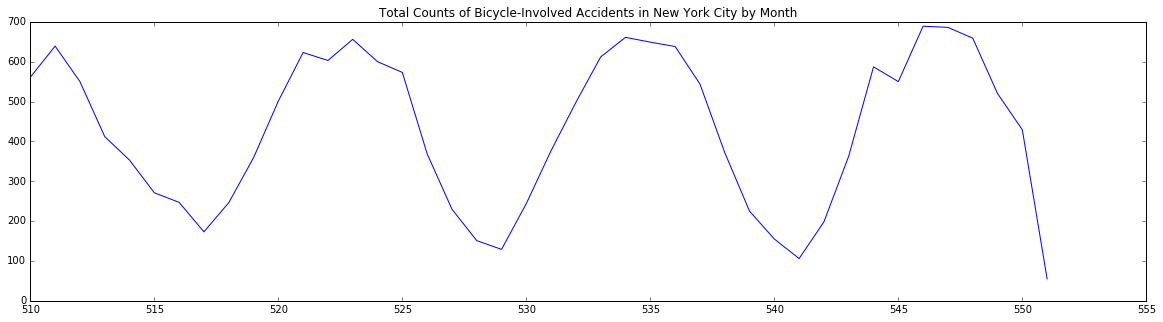

In [10]:
fig = pl.figure(figsize=(20,5))
plot(bikeAccidents.TIME.groupby(by=bikeAccidents.DATE.dt.to_period("M")).agg([count_nonzero]))
title('Total Counts of Bicycle-Involved Accidents in New York City by Month')

In [18]:
bikeAxGrouped = bikeAccidents.TIME.groupby(by=bikeAccidents.DATE.dt.to_period("M")).agg([count_nonzero])

In [31]:
bikeAxGrouped.index

PeriodIndex(['2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
             '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
             '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
             '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
             '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
             '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12'],
            dtype='int64', freq='M')

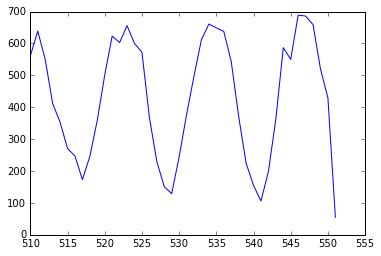

In [33]:
plot(bikeAxGrouped)